# **Importing Necessary Libraries and Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import sklearn
import scipy
%matplotlib inline
sns.set()

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

# **Version of Libraries and Packages**

In [3]:
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"Scipy: {scipy.__version__}")

Pandas: 2.2.2
Numpy: 1.26.4
Seaborn: 0.13.2
Scikit-learn: 1.4.2
Scipy: 1.13.0


# **Loading Dataset**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df[df["HeartDisease"]=="Yes"].sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
315224,Yes,24.63,Yes,Yes,No,0.0,0.0,No,Male,55-59,Other,No,Yes,Good,6.0,No,No,No
40852,Yes,34.92,No,No,No,3.0,0.0,Yes,Male,70-74,White,No,No,Good,8.0,No,No,No
270116,Yes,45.35,No,No,No,30.0,5.0,Yes,Female,80 or older,White,"No, borderline diabetes",Yes,Fair,6.0,No,No,No
138060,Yes,23.63,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Good,7.0,No,No,No
290806,Yes,26.63,Yes,Yes,No,1.0,1.0,No,Female,50-54,White,No,Yes,Very good,5.0,No,No,No


# **Discovering About the Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df.duplicated().sum()

18078

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# **Handling outliers**

In [12]:
column = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

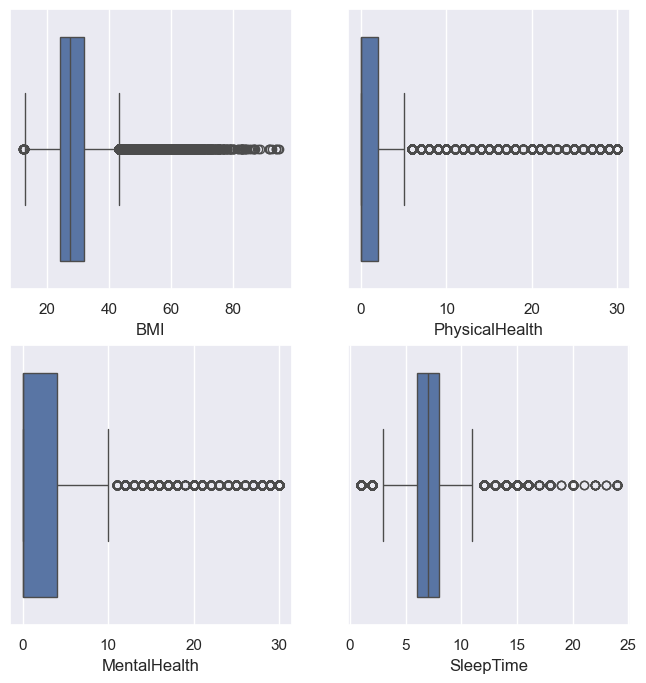

In [13]:
plt.figure(figsize = (8,8))
for i, col in enumerate(column):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df[col])
plt.show()

In [14]:
df1 = df

In [15]:
def remove_outliers(df1, col):
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df1[~((df1[col] >= lower_bound) & (df1[col] <= upper_bound))]
    df1.loc[outliers.index, col] = df1[col].mean()
    return df1

In [16]:
df1 = remove_outliers(df1, "BMI")
df1 = remove_outliers(df1, "PhysicalHealth")
df1 = remove_outliers(df1, "MentalHealth")
df1 = remove_outliers(df1, "SleepTime")

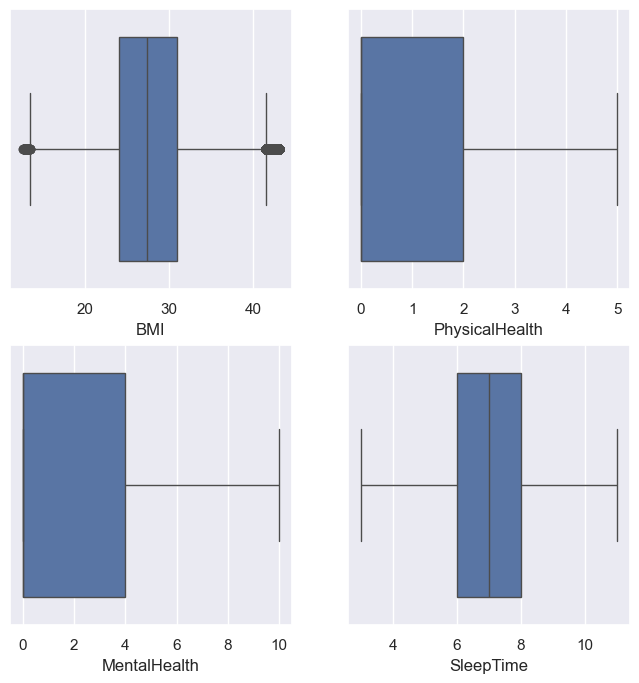

In [17]:
plt.figure(figsize = (8,8))
for i, col in enumerate(column):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df1[col])
plt.show()

# **Exploratory Data Analysis (EDA)**

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.000000,4.121475,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,3.572298,4.121475,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,3.572298,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [19]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,27.844480,0.961752,1.627625,7.044025
std,5.310186,1.556512,2.533366,1.251073
min,12.650000,0.000000,0.000000,3.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.010000,2.000000,4.000000,8.000000
max,43.080000,5.000000,10.000000,11.000000


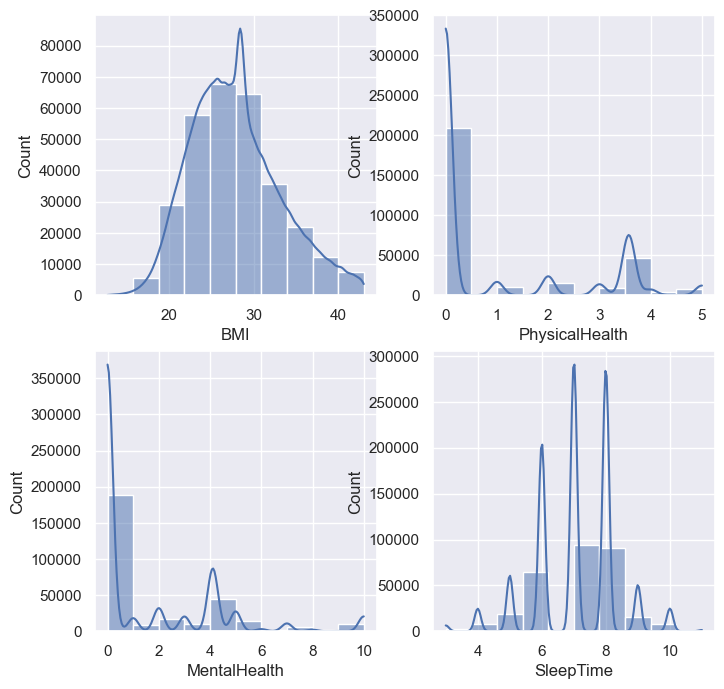

In [20]:
plt.figure(figsize = (8,8))
for i, col in enumerate(column):
    plt.subplot(2, 2, i+1)
    sns.histplot(data = df, x= col, kde = True, bins = 10)
plt.show()

In [21]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

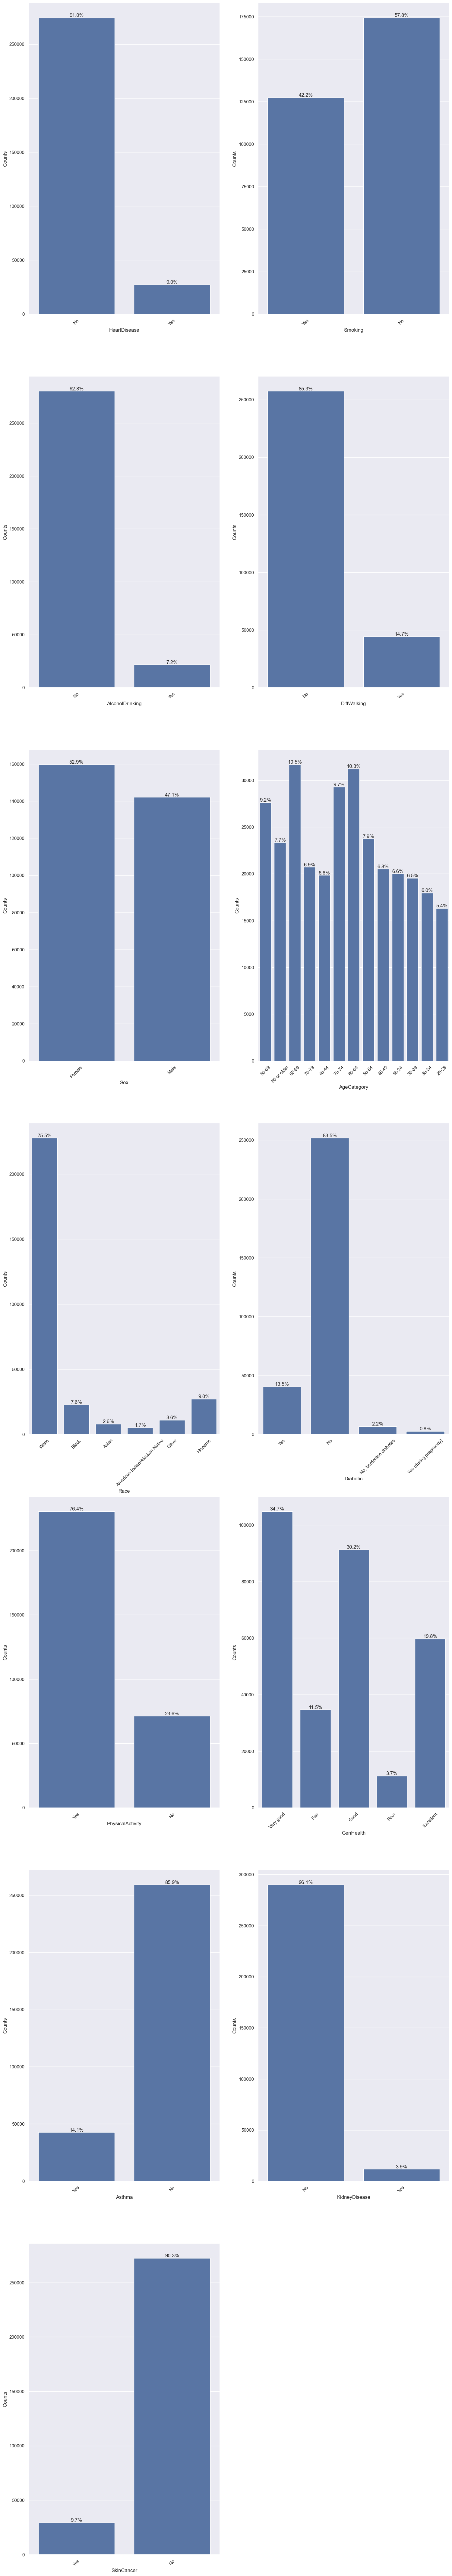

In [22]:
new_col = ['HeartDisease', 'Smoking', 'AlcoholDrinking' , 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
plt.figure(figsize = (18, 110))
for i, col in enumerate(new_col):
    plt.subplot(7, 2, i+1)
    sns.countplot(data = df, x = col)
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.xticks(rotation = 45)
    for bar in plt.gca().patches:
        percentage = f'{round(bar.get_height() / len(df) * 100, 1)}%'
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   percentage, ha='center', va='bottom')
    #In the code below I want to show the counts in percentage in the plot. What Can I do?
plt.show()

# **Data Manupulation**

In [23]:
data = df1
data = data[data.columns].replace({
    "Yes" : 1,
    "No" : 0,
    "Yes (during pregnancy)" : 1,
    "No, borderline diabetes" : 0,
    "Male" : 1,
    "Female" : 0
})
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
245839,0,37.93,0,0,0,0.000000,0.000000,0,1,30-34,Other,0,1,Good,8.0,0,0,0
144616,1,31.93,1,1,0,0.000000,4.121475,0,1,60-64,White,0,0,Very good,9.0,0,0,0
97167,0,24.39,1,0,0,3.572298,4.121475,1,1,55-59,White,0,0,Fair,4.0,0,0,0
205512,0,24.39,0,0,0,0.000000,0.000000,0,0,45-49,Black,0,1,Excellent,7.0,0,0,0
149464,0,35.62,1,0,0,0.000000,0.000000,0,1,35-39,White,0,1,Very good,7.0,1,0,0
48558,0,23.29,1,1,0,1.000000,10.000000,0,1,25-29,White,0,1,Very good,5.0,0,0,0
21414,0,36.72,0,0,0,0.000000,0.000000,0,0,60-64,Hispanic,0,1,Good,8.0,1,0,0
163430,0,35.73,0,0,0,0.000000,0.000000,0,1,65-69,White,1,1,Good,6.0,0,0,1
285084,0,18.12,1,0,0,0.000000,0.000000,0,0,65-69,Black,0,0,Good,8.0,0,0,0
231442,0,21.22,1,0,0,5.000000,4.121475,0,0,70-74,White,0,1,Good,6.0,0,0,0


In [24]:
lb=LabelEncoder()
data['AgeCategory']=lb.fit_transform(data['AgeCategory'])
data["Race"] = lb.fit_transform(data["Race"])
data["GenHealth"] = lb.fit_transform(data["GenHealth"])

In [25]:
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
226063,0,22.31,0,0,0,0.000000,0.0,0,0,6,1,0,1,0,7.0,1,0,0
240621,0,28.06,0,0,0,1.000000,0.0,0,1,3,5,0,1,4,7.0,0,0,0
155146,1,26.57,0,0,1,0.000000,7.0,1,0,12,5,1,0,0,8.0,1,0,1
3645,0,42.43,0,0,0,3.572298,0.0,0,0,8,5,1,0,2,6.0,0,0,0
129892,0,29.21,0,0,0,0.000000,0.0,0,1,7,5,0,1,2,6.0,0,0,1
317507,0,22.38,0,0,0,0.000000,0.0,0,1,1,3,0,1,4,7.0,0,0,0
172707,0,27.98,1,0,0,0.000000,0.0,0,1,8,5,0,1,2,7.0,0,0,0
202304,0,31.47,1,0,0,3.572298,0.0,0,0,8,5,0,1,4,5.0,0,0,0
243452,0,32.36,0,0,0,0.000000,0.0,0,1,1,5,0,1,4,5.0,0,0,0
138743,0,29.53,0,0,0,2.000000,0.0,0,1,1,5,0,1,4,7.0,1,0,0


In [26]:
df1["AgeCategory"].value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

In [27]:
data["AgeCategory"].value_counts()

AgeCategory
9     31670
8     31219
10    29273
7     27610
6     23736
12    23352
11    20713
5     20518
0     19998
4     19837
3     19526
2     17953
1     16312
Name: count, dtype: int64

In [28]:
df1["Race"].value_counts()

Race
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: count, dtype: int64

In [29]:
data["Race"].value_counts()

Race
5    227724
3     27107
2     22810
4     10891
1      7993
0      5192
Name: count, dtype: int64

In [30]:
df1["GenHealth"].value_counts()

GenHealth
Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: count, dtype: int64

In [31]:
data["GenHealth"].value_counts()

GenHealth
4    104796
2     91239
0     59737
1     34659
3     11286
Name: count, dtype: int64

# **Checking Correlation**

In [32]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [33]:
corr = data.corr()["HeartDisease"].sort_values(ascending=False)

corr = corr.to_frame()
corr.style.background_gradient(cmap = 'RdYlBu')

,HeartDisease
HeartDisease,1.000000
AgeCategory,0.239259
DiffWalking,0.196420
Stroke,0.194665
Diabetic,0.170331
KidneyDisease,0.142672
PhysicalHealth,0.131172
Smoking,0.104524
SkinCancer,0.090644
Sex,0.074435


# **Data Preprocessing**

In [34]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [35]:
X = data.drop("HeartDisease", axis = 1)
y = data["HeartDisease"]

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [37]:
print(f"X value shape: {X.shape}")
print(f"X_resampled value shape: {X_resampled.shape}")

X value shape: (301717, 17)
X_resampled value shape: (548912, 17)


In [38]:
print(f"y value shape: {y.shape}")
print(f"y_resampled value shape: {y_resampled.shape}")

y value shape: (301717,)
y_resampled value shape: (548912,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

# **Feature Selection**

In [40]:
X_train.sample(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
362980,0.533937,1.0,0.0,1.0,0.00000,0.000000,0.0,1.0,0.833333,1.000000,0.0,1.0,0.250000,0.569009,0.0,0.0,0.0
316286,0.794917,1.0,0.0,1.0,0.71446,0.000000,1.0,1.0,0.522320,1.000000,1.0,0.0,0.750000,0.808039,0.0,0.0,0.0
328521,0.763028,0.0,0.0,1.0,0.68398,0.302396,1.0,1.0,0.766761,0.706516,1.0,1.0,0.616855,0.224859,1.0,1.0,0.0
494109,0.248681,0.0,0.0,0.0,0.00000,0.000000,0.0,1.0,0.908873,1.000000,0.0,1.0,0.500000,0.636690,0.0,0.0,0.0
22242,0.386461,0.0,0.0,0.0,0.00000,0.800000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.250000,0.375000,1.0,0.0,0.0


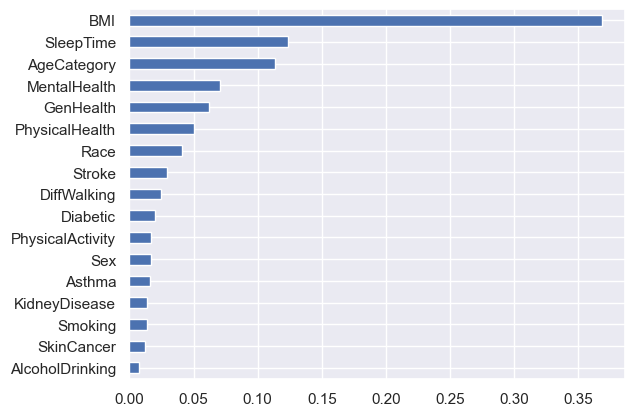

In [41]:
feat_selection = ExtraTreesClassifier()
feat_selection.fit(X,y)
feature_importance = pd.Series(feat_selection.feature_importances_, index = X.columns)
feature_importance = feature_importance.nlargest(len(data.columns)).sort_values(ascending = True)
feature_importance.plot(kind = "barh")
plt.show()

In [42]:
X_train = X_train.drop(['Sex', 'Diabetic', 'Stroke', 'Smoking', 'PhysicalActivity', 'KidneyDisease', 'Asthma',  'SkinCancer', 'AlcoholDrinking'], axis = 1)
X_test = X_test.drop(['Sex', 'Diabetic', 'Stroke', 'Smoking', 'PhysicalActivity', 'KidneyDisease', 'Asthma',  'SkinCancer', 'AlcoholDrinking'], axis = 1)

# **Data Modeling**

In [43]:
def model_evalute(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'train_accuracy': round(train_acc, 2), 'test_accuracy': round(train_acc, 2), 'precision': round(prec, 2), 'recall':round(rec, 2), 'f1_score': round(f1, 2), 'kappa':round(kappa, 2),'fpr':fpr, 'tpr': tpr, 'auc': round(auc, 2), 'cm': cm}

# **Random Forest Classification**

In [44]:
rf = RandomForestClassifier(n_estimators= 200,
                            min_samples_split=5,
                            min_samples_leaf= 1,
                            max_depth=30,
                            criterion= 'gini',
                            bootstrap= False)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=200)

In [45]:
rf_eval = model_evalute(rf, X_train, y_train, X_test, y_test)

In [46]:
print(f"Train Accuracy: {round((rf.score(X_train, y_train)), 2)}")
print(f"Test Accuracy: {round((rf.score(X_test, y_test)),2)}")

Train Accuracy: 0.97
Test Accuracy: 0.9


In [47]:
y_pred = rf.predict(X_test)
rf_conf = metrics.confusion_matrix(y_test, y_pred)

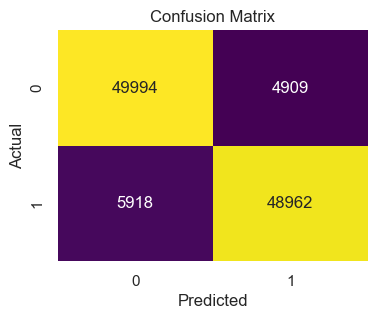

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(rf_conf, annot = True, fmt = "d", cmap = "viridis", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     54903
           1       0.91      0.89      0.90     54880

    accuracy                           0.90    109783
   macro avg       0.90      0.90      0.90    109783
weighted avg       0.90      0.90      0.90    109783



# **Decesion Tree Classification**

In [50]:
DT = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = None, min_samples_leaf = 4, min_samples_split = 2)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=42)

In [51]:
DT_eval = model_evalute(DT, X_train, y_train, X_test, y_test)

In [52]:
print(f"Train Accuracy: {round((DT.score(X_train, y_train)), 2)}")
print(f"Test Accuracy: {round((DT.score(X_test, y_test)),2)}")

Train Accuracy: 0.94
Test Accuracy: 0.89


In [53]:
y_pred = DT.predict(X_test)
DT_conf = metrics.confusion_matrix(y_test, y_pred)

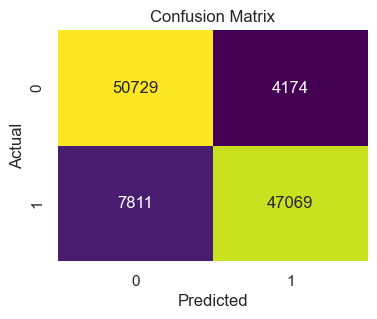

In [54]:
y_pred = DT.predict(X_test)
conf = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(DT_conf, annot = True, fmt = "d", cmap = "viridis", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     54903
           1       0.92      0.86      0.89     54880

    accuracy                           0.89    109783
   macro avg       0.89      0.89      0.89    109783
weighted avg       0.89      0.89      0.89    109783



# **Model Comparision**

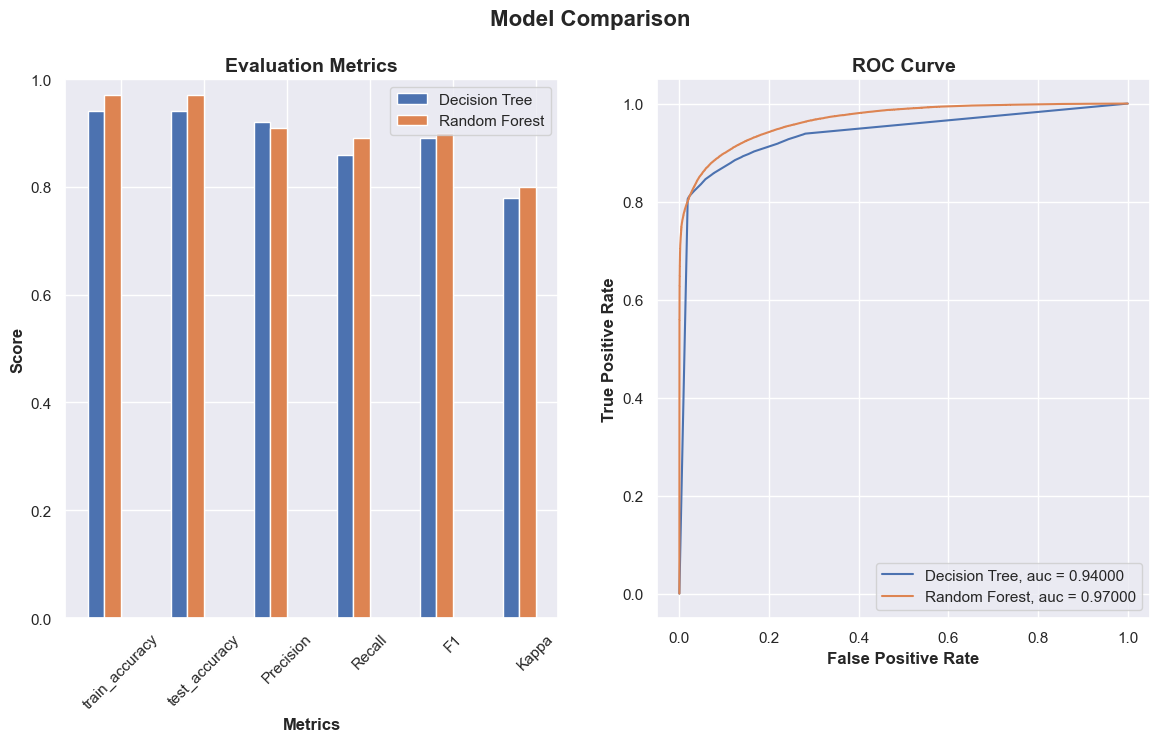

In [56]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dt_score = [DT_eval['train_accuracy'], DT_eval['test_accuracy'], DT_eval['precision'], DT_eval['recall'], DT_eval['f1_score'], DT_eval['kappa']]
rf_score = [rf_eval['train_accuracy'], rf_eval['test_accuracy'], rf_eval['precision'], rf_eval['recall'], rf_eval['f1_score'], rf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['train_accuracy', 'test_accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))])
ax1.set_xticklabels(labels, rotation=45)  # Rotate xticks by 90 degrees
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(DT_eval['fpr'], DT_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(DT_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


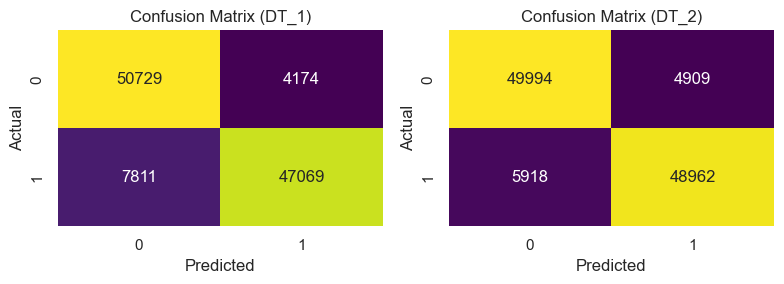

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # Create a figure with 1 row and 2 columns

# Generate heatmap for the first confusion matrix
sns.heatmap(DT_eval['cm'], annot=True, fmt="d", cmap="viridis", cbar=False, ax=axs[0])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[0].set_title("Confusion Matrix (DT_1)")

# Generate heatmap for the second confusion matrix
sns.heatmap(rf_eval['cm'], annot=True, fmt="d", cmap="viridis", cbar=False, ax=axs[1])
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")
axs[1].set_title("Confusion Matrix (DT_2)")


# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

# **Model Deployment with Decision Tree**

In [58]:
with open("DT.pkl", "wb") as f:
    pickle.dump(DT, f)